Cluster Analysis for Pairs Trading

1. Data Preparation
2. k-Means Clustering
3. Hierarchical Clustering
4. Affinity Propagation Clustering
5. Model Performance
6. Pairs Extraction

Data Extraction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('etfs.csv',index_col="Date")
data.index = pd.to_datetime(data.index)
data

,ACWI,DIA,DVY,EEM,EFA,EFG,EFV,EWJ,FTCS,FVD,...,VYM,XBI,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
1/4/10,32.882568,78.916664,28.334114,32.683086,38.690956,44.652161,31.561934,32.557251,17.028843,9.895590,...,25.738609,17.594503,38.477596,9.432528,21.969957,19.192505,18.808447,19.625519,25.311979,25.304152
1/5/10,33.156841,78.789673,28.213045,32.920300,38.725052,44.604874,31.763165,32.752796,17.053526,9.866245,...,25.738609,17.662304,38.791641,9.605900,22.047543,19.167759,18.815502,19.391869,25.063744,25.396935
1/6/10,33.149231,78.841949,28.251280,32.989162,38.888733,44.691563,31.854626,32.883148,17.045298,9.844242,...,25.792103,17.897968,39.256180,9.625158,22.094080,18.953312,18.801395,19.505537,25.319988,25.430672
1/7/10,32.989239,79.125748,28.283133,32.797859,38.738697,44.589119,31.726572,32.589836,17.045298,9.873583,...,25.838898,17.897968,39.197281,9.830635,22.334578,18.879082,18.801395,19.417133,25.408073,25.641537
1/8/10,33.194935,79.252777,28.327734,33.058048,39.045601,44.927982,32.061958,32.980915,17.037071,9.902926,...,25.885693,17.978689,39.452450,9.772840,22.691429,19.002806,18.737925,19.398188,25.448111,25.633104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/23/22,85.059998,331.648895,120.959999,37.799999,65.889999,84.010002,46.009998,54.770000,75.199997,40.070000,...,108.290001,80.879997,87.059998,33.950001,98.389999,124.599998,75.180000,70.910004,136.100006,129.429993
12/27/22,85.029999,332.088531,121.750000,38.360001,65.989998,84.029999,46.150002,54.520000,75.139999,40.189999,...,108.610001,78.540001,87.989998,33.939999,98.690002,123.419998,75.540001,71.349998,135.750000,127.330002
12/28/22,83.930000,328.291748,120.139999,37.799999,65.290001,83.220001,45.619999,53.869999,74.410004,39.720001,...,107.449997,78.830002,86.019997,33.820000,97.400002,121.430000,74.599998,70.669998,134.869995,126.260002


Check for missing values

In [3]:
data.isnull().values.any()

False

<AxesSubplot:>

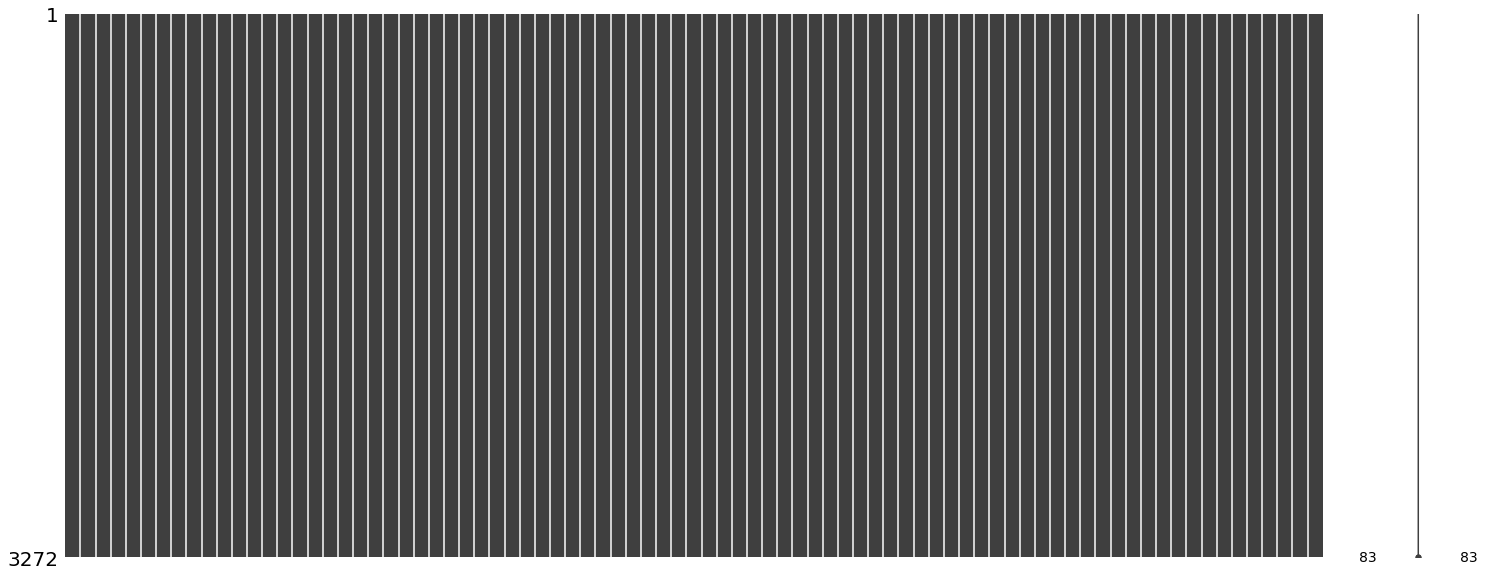

In [4]:
# !pip install missingno
import missingno
missingno.matrix(data)

In [5]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
missing_percentage.head(10)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (3272, 83)
Data Shape after cleaning = (3272, 83)


In [6]:
data = data.fillna(method='ffill')

Create DF for mean returns and volatility

In [7]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(266)

data = returns
data.head()

,returns,volatility
ACWI,0.094282,0.184784
DIA,0.132265,0.176441
DVY,0.133228,0.175299
EEM,0.038397,0.229122
EFA,0.062505,0.197035


Scale the data to normalize it between 0 and 1

In [8]:
from sklearn.preprocessing import StandardScaler

# #Prepare the scaler
# scale = StandardScaler().fit(data)

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(-1,1))

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

,returns,volatility
ACWI,-0.356383,-0.681987
DIA,0.081055,-0.748786
DVY,0.092143,-0.757929
EEM,-1.000000,-0.326993
EFA,-0.722356,-0.583896


K-Means Clustering

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Find optimal number of clusters using elbow method

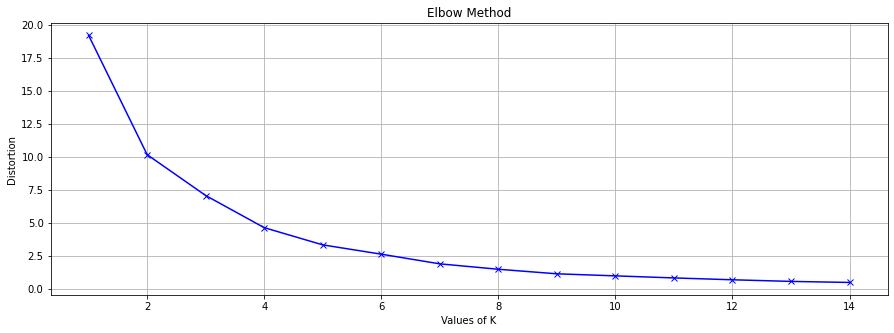

In [10]:
K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    # inertia[k] = kmeanModel.inertia_
    
#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [11]:
# !pip install kneed
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

Find optimal number of clusters using silhouette method

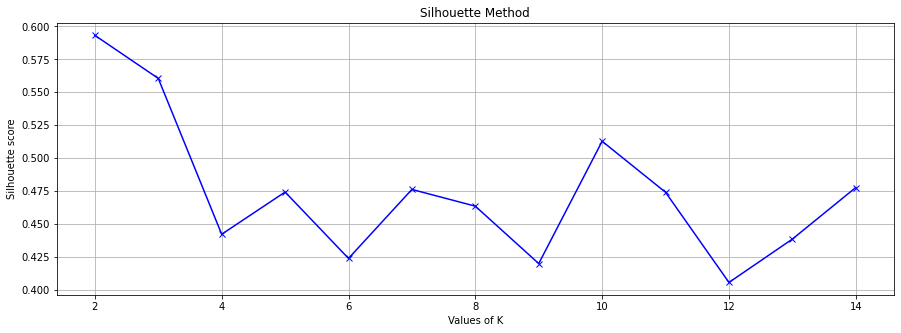

Suggested number of clusters:  4


In [12]:
from sklearn.metrics import silhouette_score

K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

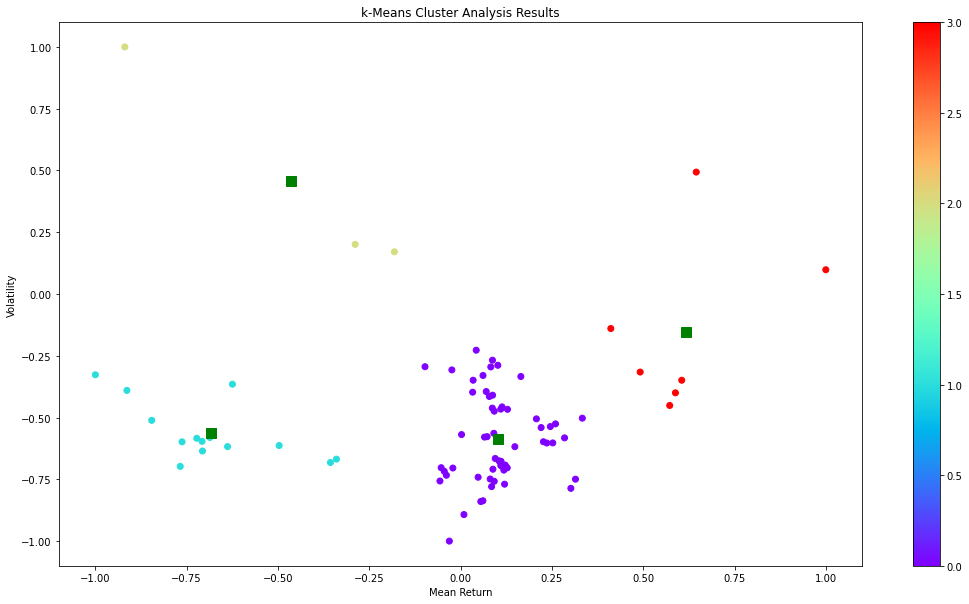

In [13]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

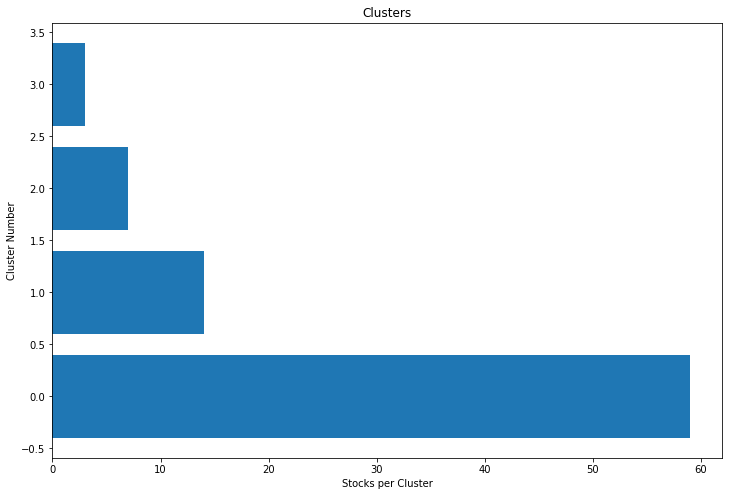

In [14]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

We see that with K-means 4 clusters are optimal and we get ETFs distributed in clusters as shown above

---

Hierarchical Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

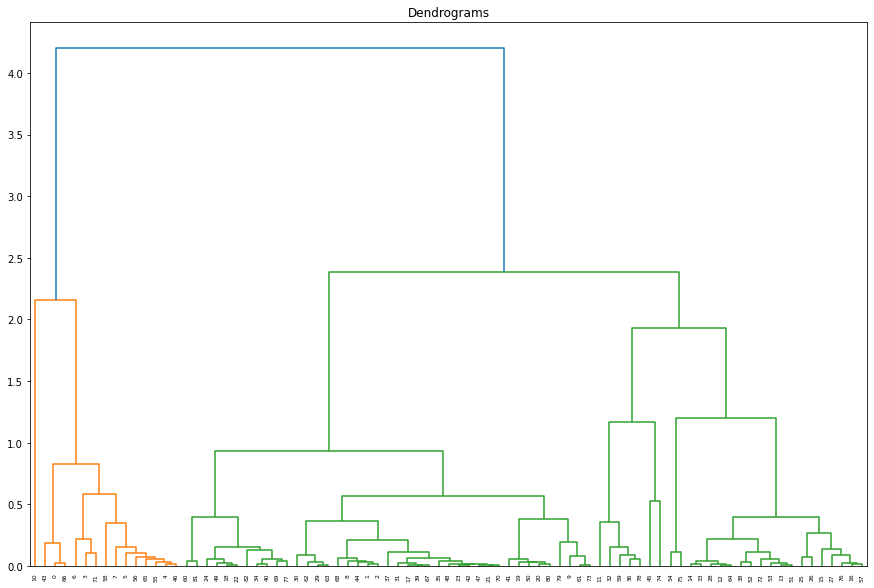

In [16]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

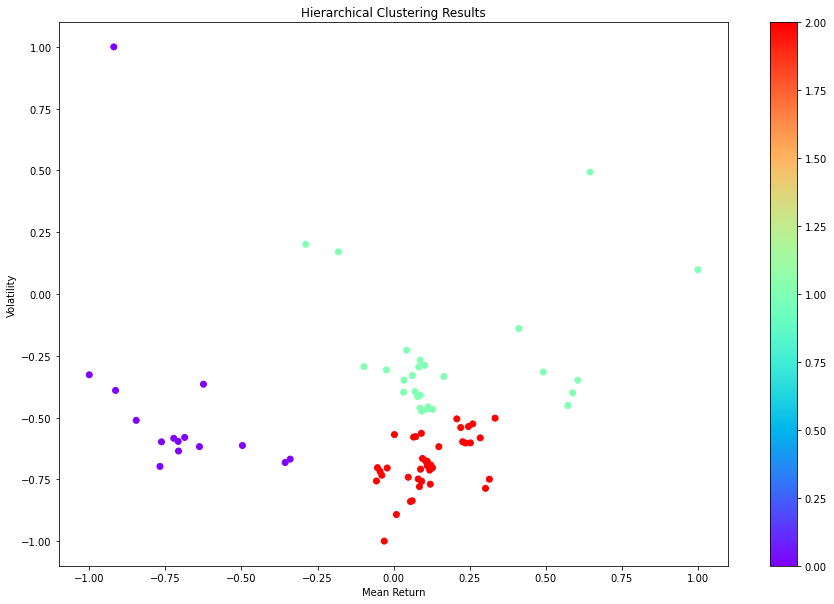

In [17]:
#Fit the model
clusters = 3
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
hc_labels_ = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=hc_labels_, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

We see that with the Hierarchical method, 3 clusters are optimal and we get ETFs distributed in clusters as shown above

---

Affinity Propagation Clustering

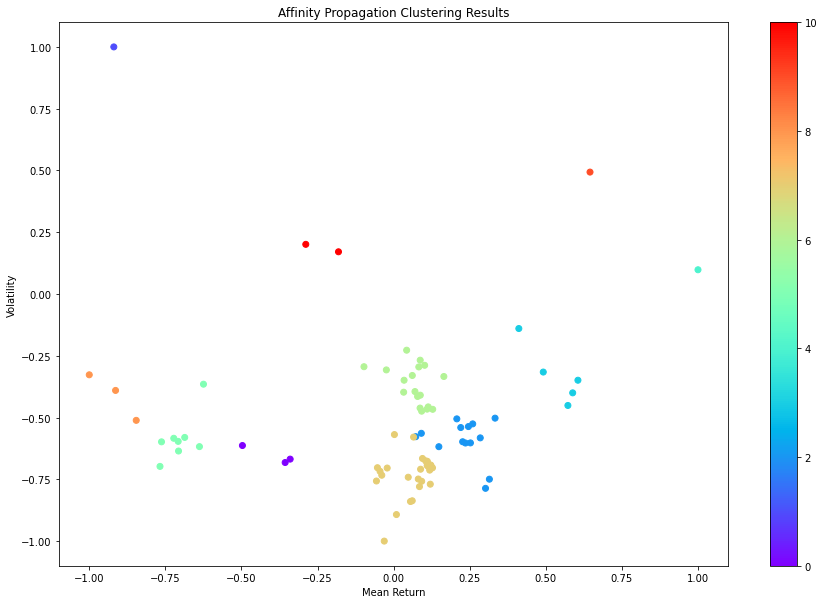

In [18]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 11


<Figure size 432x288 with 0 Axes>

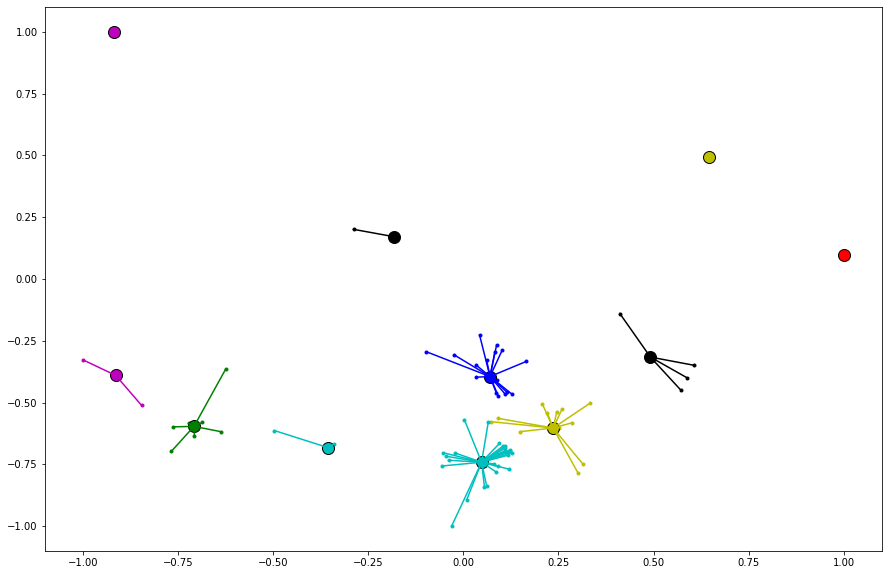

In [19]:
from itertools import cycle

cci = ap.cluster_centers_indices_
labels2 = ap.labels_

clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

We see that with the Affinity Propagation method, 11 clusters are optimal and we get ETFs distributed in clusters as shown above

---

Compare Silhouette Scores of 3 Clustering Methods

In [20]:
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.labels_, metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.5966602344782646
Hierarchical Clustering 0.42893806971845977
Affinity Propagation Clustering 0.47953238822731825


----

We create a class to create opportunistic pairs from clustering results of all three algos

In [23]:
from itertools import combinations

class MakePairs():

    def __init__(self,labels,X):
        self.labels = labels
        self.X = X
        self.X['cluster'] = self.labels
        # self.data = data
        self._make_pairs()

    def _find_useful_clusters(self):

        self.useful_clusters = list(self.X.groupby(by='cluster', ).count().sort_values('returns',ascending=False).head(3).index)

    def _remove_highly_correlated_pairs(self):

        remove_cluster = []        

        for x in self.pairs:

            remove_cluster_list = []

            # for y in x:
            #     if abs(self.X.loc[y[0],'returns']-self.X.loc[y[1],'returns'])<0.01 and abs(self.X.loc[y[0],'volatility']-self.X.loc[y[1],'volatility'])<0.001:
            #         remove_cluster_list.append(y)

            for y in x:
                if (self.X.loc[y[0],'volatility'])/self.X.loc[y[0],'returns']<0.5 or (self.X.loc[y[1],'volatility'])/self.X.loc[y[1],'returns']<0.5:
                    remove_cluster_list.append(y)
            
            remove_cluster.append(remove_cluster_list)

        for i in range(2):
            for x in remove_cluster[i]:
                self.pairs[i].remove(x)

    def _make_pairs(self):

        self._find_useful_clusters()
        
        self.X_useful = self.X[self.X['cluster'].isin(self.useful_clusters)]

        self.clustered_etfs = []

        for x in self.X_useful['cluster'].unique():

            self.clustered_etfs.append(list(self.X_useful[self.X_useful['cluster'] == x].index))

        self.pairs = []
        self.pairs += [list(combinations(x,2)) for x in self.clustered_etfs]

        self._remove_highly_correlated_pairs()



In [24]:
k_means_pairs = MakePairs(k_means.labels_,X)

k_means_pairs.pairs

[[('ACWI', 'EFA'),
  ('ACWI', 'EFG'),
  ('ACWI', 'EFV'),
  ('ACWI', 'EWJ'),
  ('ACWI', 'SCZ'),
  ('ACWI', 'SPDW'),
  ('ACWI', 'VEA'),
  ('ACWI', 'VEU'),
  ('ACWI', 'VGK'),
  ('ACWI', 'VSS'),
  ('ACWI', 'VT'),
  ('EFA', 'EFG'),
  ('EFA', 'EFV'),
  ('EFA', 'EWJ'),
  ('EFA', 'SCZ'),
  ('EFA', 'SPDW'),
  ('EFA', 'VEA'),
  ('EFA', 'VEU'),
  ('EFA', 'VGK'),
  ('EFA', 'VSS'),
  ('EFA', 'VT'),
  ('EFG', 'EFV'),
  ('EFG', 'EWJ'),
  ('EFG', 'SCZ'),
  ('EFG', 'SPDW'),
  ('EFG', 'VEA'),
  ('EFG', 'VEU'),
  ('EFG', 'VGK'),
  ('EFG', 'VSS'),
  ('EFG', 'VT'),
  ('EFV', 'EWJ'),
  ('EFV', 'SCZ'),
  ('EFV', 'SPDW'),
  ('EFV', 'VEA'),
  ('EFV', 'VEU'),
  ('EFV', 'VGK'),
  ('EFV', 'VSS'),
  ('EFV', 'VT'),
  ('EWJ', 'SCZ'),
  ('EWJ', 'SPDW'),
  ('EWJ', 'VEA'),
  ('EWJ', 'VEU'),
  ('EWJ', 'VGK'),
  ('EWJ', 'VSS'),
  ('EWJ', 'VT'),
  ('SCZ', 'SPDW'),
  ('SCZ', 'VEA'),
  ('SCZ', 'VEU'),
  ('SCZ', 'VGK'),
  ('SCZ', 'VSS'),
  ('SCZ', 'VT'),
  ('SPDW', 'VEA'),
  ('SPDW', 'VEU'),
  ('SPDW', 'VGK'),
  ('SPDW', 'VS

In [26]:
hc_pairs = MakePairs(hc.labels_,X)

hc_pairs.pairs

[[('ACWI', 'EFA'),
  ('ACWI', 'EFG'),
  ('ACWI', 'EFV'),
  ('ACWI', 'EWJ'),
  ('ACWI', 'SCZ'),
  ('ACWI', 'SPDW'),
  ('ACWI', 'VEA'),
  ('ACWI', 'VEU'),
  ('ACWI', 'VGK'),
  ('ACWI', 'VSS'),
  ('ACWI', 'VT'),
  ('EFA', 'EFG'),
  ('EFA', 'EFV'),
  ('EFA', 'EWJ'),
  ('EFA', 'SCZ'),
  ('EFA', 'SPDW'),
  ('EFA', 'VEA'),
  ('EFA', 'VEU'),
  ('EFA', 'VGK'),
  ('EFA', 'VSS'),
  ('EFA', 'VT'),
  ('EFG', 'EFV'),
  ('EFG', 'EWJ'),
  ('EFG', 'SCZ'),
  ('EFG', 'SPDW'),
  ('EFG', 'VEA'),
  ('EFG', 'VEU'),
  ('EFG', 'VGK'),
  ('EFG', 'VSS'),
  ('EFG', 'VT'),
  ('EFV', 'EWJ'),
  ('EFV', 'SCZ'),
  ('EFV', 'SPDW'),
  ('EFV', 'VEA'),
  ('EFV', 'VEU'),
  ('EFV', 'VGK'),
  ('EFV', 'VSS'),
  ('EFV', 'VT'),
  ('EWJ', 'SCZ'),
  ('EWJ', 'SPDW'),
  ('EWJ', 'VEA'),
  ('EWJ', 'VEU'),
  ('EWJ', 'VGK'),
  ('EWJ', 'VSS'),
  ('EWJ', 'VT'),
  ('SCZ', 'SPDW'),
  ('SCZ', 'VEA'),
  ('SCZ', 'VEU'),
  ('SCZ', 'VGK'),
  ('SCZ', 'VSS'),
  ('SCZ', 'VT'),
  ('SPDW', 'VEA'),
  ('SPDW', 'VEU'),
  ('SPDW', 'VGK'),
  ('SPDW', 'VS

In [27]:
ap_pairs = MakePairs(ap.labels_,X)

ap_pairs.pairs

[[('IUSV', 'IVE'),
  ('IUSV', 'SCHV'),
  ('IUSV', 'SPYV'),
  ('IUSV', 'XLP'),
  ('IUSV', 'XLU'),
  ('IVE', 'SCHV'),
  ('IVE', 'SPYV'),
  ('IVE', 'XLP'),
  ('IVE', 'XLU'),
  ('SCHV', 'SPYV'),
  ('SCHV', 'XLP'),
  ('SCHV', 'XLU'),
  ('SPYV', 'XLP'),
  ('SPYV', 'XLU'),
  ('XLP', 'XLU')],
 [('IWM', 'IWN')],
 [('IUSG', 'IVW'),
  ('IUSG', 'IWF'),
  ('IUSG', 'IWR'),
  ('IUSG', 'MGK'),
  ('IUSG', 'RSP'),
  ('IUSG', 'SCHG'),
  ('IUSG', 'SPYG'),
  ('IUSG', 'VHT'),
  ('IUSG', 'VO'),
  ('IUSG', 'VUG'),
  ('IUSG', 'XLI'),
  ('IUSG', 'XLV'),
  ('IUSG', 'XLY'),
  ('IVW', 'IWF'),
  ('IVW', 'IWR'),
  ('IVW', 'MGK'),
  ('IVW', 'RSP'),
  ('IVW', 'SCHG'),
  ('IVW', 'SPYG'),
  ('IVW', 'VHT'),
  ('IVW', 'VO'),
  ('IVW', 'VUG'),
  ('IVW', 'XLI'),
  ('IVW', 'XLV'),
  ('IVW', 'XLY'),
  ('IWF', 'IWR'),
  ('IWF', 'MGK'),
  ('IWF', 'RSP'),
  ('IWF', 'SCHG'),
  ('IWF', 'SPYG'),
  ('IWF', 'VHT'),
  ('IWF', 'VO'),
  ('IWF', 'VUG'),
  ('IWF', 'XLI'),
  ('IWF', 'XLV'),
  ('IWF', 'XLY'),
  ('IWR', 'MGK'),
  ('IWR', 'RS

In [29]:
import json
 
# Data to be written
cluster_models = {'k-means':k_means_pairs.pairs,'hierarchical':hc_pairs.pairs,'affinity-propagation':ap_pairs.pairs}
 
# Serializing json
json_object = json.dumps(cluster_models, indent=4)
 
# Writing to sample.json
with open("cluster_models.json", "w") as outfile:
    outfile.write(json_object)